In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
%matplotlib inline

same_size = False

if same_size == True:
    unet_multi_folder = "Latents_SameSize/UNetMulti/"
    unet_folder = "Latents_SameSize/UNet/"
    hybrid_folder = "Latents_SameSize/Hybrid/"
else:
    unet_folder = "Latents/UNet/"
    unet_multi_folder = "Latents/UNetMulti/"
    hybrid_folder = "Latents/Hybrid/"

unet_files = os.listdir(unet_folder)
unet_files.sort()

unet_multi_files = os.listdir(unet_folder)
unet_multi_files.sort()

hybrid_files = os.listdir(hybrid_folder)
hybrid_files.sort()

unet_latents = []
unet_multi_latents = []
hybrid_latents = []

for file in hybrid_files:
    hybrid_latents.append(np.load(hybrid_folder + file))

for file in unet_files:
    f = unet_folder + file
    array = np.load(f)
    unet_latents.append(array)

for file in unet_multi_files:
    f = unet_multi_folder + file
    array = np.load(f)
    unet_multi_latents.append(array)
    
unet_latents = np.array(unet_latents)
unet_multi_latents = np.array(unet_multi_latents)
hybrid_latents = np.array(hybrid_latents)

# Normalize the data using sklearn StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
unet_latents = scaler.fit_transform(unet_latents)
unet_multi_latents = scaler.fit_transform(unet_multi_latents)
hybrid_latents = scaler.fit_transform(hybrid_latents)

In [18]:
targets = []
for file in unet_files:
    if "CHNCXR" in file:
        targets.append("Shenzhen")
    elif "JPC" in file:
        targets.append("JSRT")
    elif "MCUCX" in file:
        targets.append("Montgomery")
    else:
        targets.append("Padchest")

CPU times: user 9.14 s, sys: 1.05 s, total: 10.2 s
Wall time: 1.97 s


/home/ngaggion/.conda/envs/umap/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


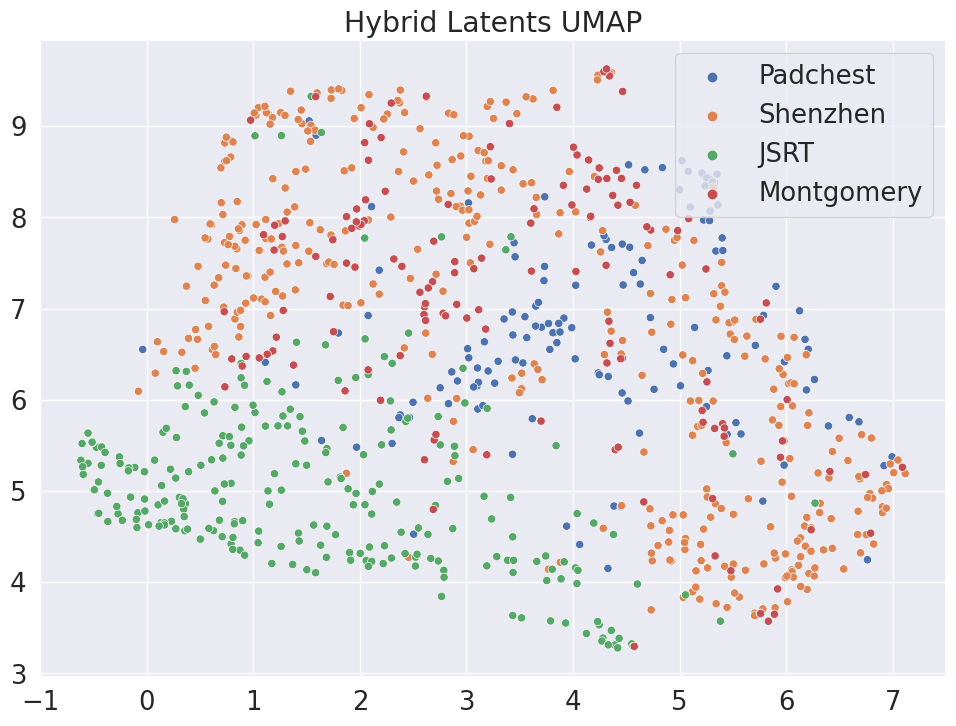

In [19]:
fit = umap.UMAP()
%time u = fit.fit_transform(hybrid_latents)

plt.figure()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.7)
palette = sns.color_palette("bright", 4)

sns.scatterplot(u[:,0], u[:,1], hue=targets)
plt.title('Hybrid Latents UMAP')

if same_size == True:
    plt.title("Hybrid Latents UMAP (lungs scaled to have same bounding box area)")
    plt.savefig("Umap_plots/hybrid_latent_space_scaled.pdf")
else:
    plt.title("Hybrid Latents UMAP")
    plt.savefig("Umap_plots/hybrid_latent_space.pdf")

CPU times: user 17.8 s, sys: 1.21 s, total: 19.1 s
Wall time: 12.9 s


/home/ngaggion/.conda/envs/umap/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


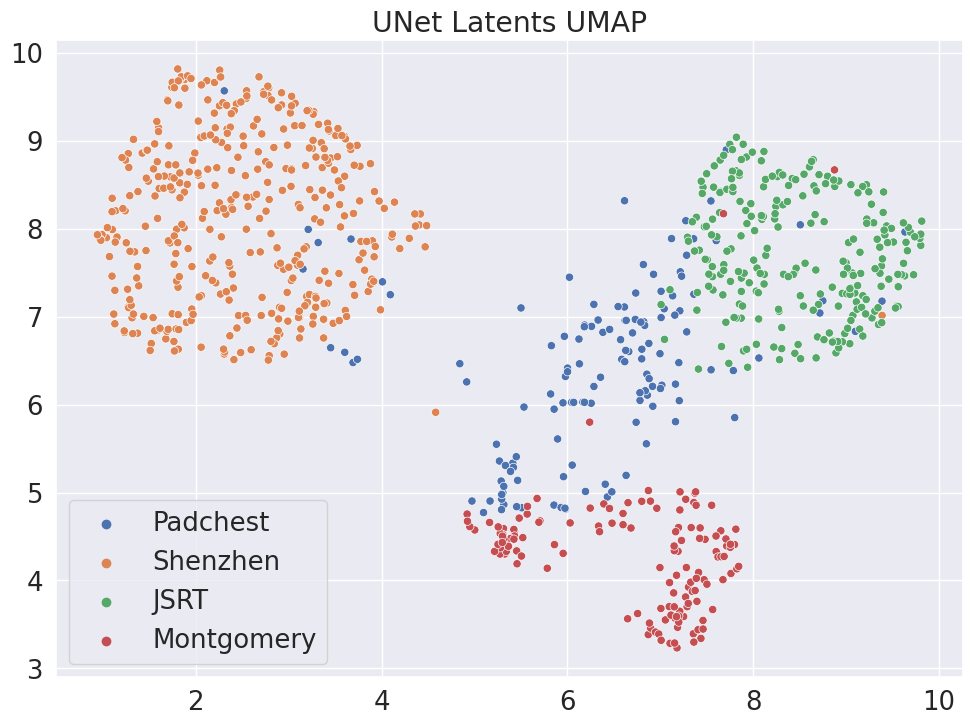

In [20]:
fit = umap.UMAP()
%time u = fit.fit_transform(unet_latents)

plt.figure()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.7)
palette = sns.color_palette("bright", 4)

sns.scatterplot(u[:,0], u[:,1], hue=targets)

if same_size == True:
    plt.title("UNet Latents UMAP (lungs scaled to have same bounding box area)")
    plt.savefig("Umap_plots/unet_latent_space_scaled.pdf")
else:
    plt.title("UNet Latents UMAP")
    plt.savefig("Umap_plots/unet_latent_space.pdf")

CPU times: user 18.3 s, sys: 1.2 s, total: 19.5 s
Wall time: 13.4 s


/home/ngaggion/.conda/envs/umap/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


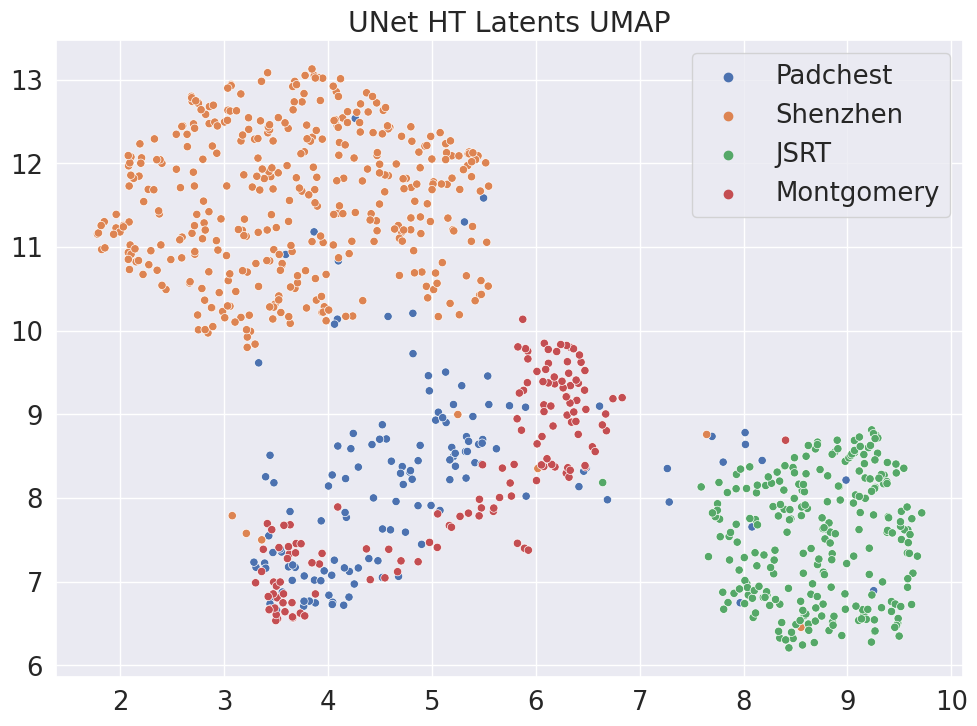

In [21]:
fit = umap.UMAP()
%time u = fit.fit_transform(unet_multi_latents)

plt.figure()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.7)
palette = sns.color_palette("bright", 4)

sns.scatterplot(u[:,0], u[:,1], hue=targets)

if same_size == True:
    plt.title("UNet HT Latents UMAP (lungs scaled to have same bounding box area)")
    plt.savefig("Umap_plots/unet_ht_latent_space_scaled.pdf")
else:
    plt.title("UNet HT Latents UMAP")
    plt.savefig("Umap_plots/unet_ht_latent_space.pdf")